# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [ ]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.2 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency info

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 150.3/208.8 MB 107.4 kB/s eta 0:09:05

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Set all the Constants

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3 #RGB
EPOCHS=50

### Import data into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [10]:
# Load images from the directory 'PlantVillage' into a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",     # The directory where your images are stored.
    seed=123,           # Seed for random number generator, ensures reproducibility of shuffling.
    shuffle=True,       # Whether to shuffle the data. 'True' means the data will be shuffled.
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  # The size to which each image will be resized.
    batch_size=BATCH_SIZE   # The size of the batches of data (number of images per batch).
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names
#['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
#[0,1,2]

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
# Iterate over the dataset to take the first batch of images and labels
for image_batch, labels_batch in dataset.take(1):
    # 'image_batch' contains a batch of images,
    # and 'labels_batch' contains the corresponding labels for these images.

    # Print the shape of 'image_batch' to understand the dimensions of the images in this batch.
    # It usually has the shape (batch_size, image_height, image_width, color_channels).
    print(image_batch.shape)

    # Convert the 'labels_batch' tensor to a NumPy array and print it.
    # This will display the labels for each image in the batch.
    print(labels_batch.numpy())


(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels 

### Visualize some of the images from our dataset

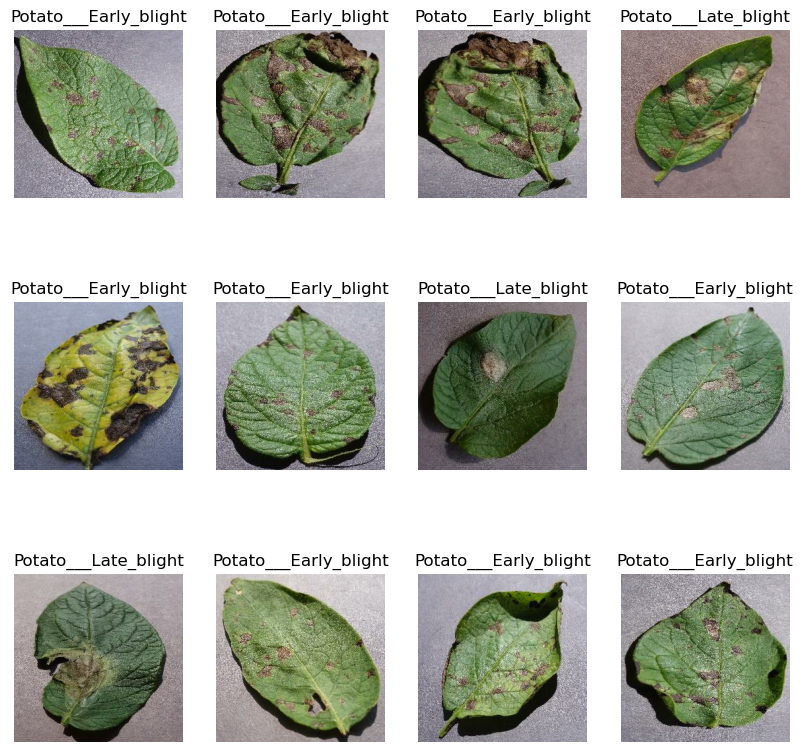

In [12]:
# Create a figure with a specified size (10x10 inches in this case).
plt.figure(figsize=(10, 10))

# Iterate over the dataset to take the first batch of images and labels.
for image_batch, labels_batch in dataset.take(1):
    # Loop through the first 12 images of the batch
    for i in range(12):
        # Create a subplot with 3 rows and 4 columns.
        # The (i + 1)th subplot is being prepared to display the ith image.
        ax = plt.subplot(3, 4, i + 1)

        # Display the ith image.
        # Convert the tensor to a numpy array and change its datatype to unsigned int.
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # Display the label of the ith image.
        # 'class_names' should be a list of class names in the order they are indexed.
        # Ensure that 'class_names' is defined and corresponds to the label indices.
        plt.title(class_names[labels_batch[i]])

        # Turn off the axis for each subplot.
        plt.axis("off")

# Display the figure with the images and labels.
plt.show()


### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [9]:
len(dataset)

68

Given that len(dataset) returns 68, this means there are 68 batches in our dataset. If we want to find out the total number of images in the dataset, we would multiply the number of batches by the batch size. Assuming we used a consistent BATCH_SIZE when creating the dataset (as mentioned earlier), the total number of images would be:

In [13]:
total_images = len(dataset) * BATCH_SIZE
print("Total number of images in the dataset:", total_images)


Total number of images in the dataset: 2176


In [18]:
# Define the proportion of the dataset to be used for training
train_size = 0.8

# Calculate the number of batches to be used in the training dataset
# 'dataset' is a TensorFlow dataset divided into batches
# 'len(dataset)' gives the total number of batches in the dataset
# Multiplying this by 'train_size' calculates the number of batches for training
# Note: This will return a float, and you might need to convert it to an integer
# especially if you're going to use it to slice or index the dataset
train_batches = len(dataset) * train_size


In [24]:
train_ds = dataset.take(54)
len(train_ds)

54

In [25]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [26]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [27]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [28]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [29]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

54

In [32]:
len(val_ds)

6

In [33]:
len(test_ds)

8

### Cache, Shuffle, and Prefetch the Dataset

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [35]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

#### Applying Data Augmentation to Train Dataset

In [37]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [38]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 29s 517ms/step - loss: 0.9111 - accuracy: 0.5041 - val_loss: 0.8090 - val_accuracy: 0.6562
Epoch 2/50
54/54 [==============================] - 27s 503ms/step - loss: 0.5990 - accuracy: 0.7390 - val_loss: 0.5197 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 27s 503ms/step - loss: 0.4551 - accuracy: 0.8171 - val_loss: 0.5143 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 27s 495ms/step - loss: 0.3390 - accuracy: 0.8536 - val_loss: 0.2578 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 27s 495ms/step - loss: 0.2459 - accuracy: 0.9022 - val_loss: 0.3554 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 27s 498ms/step - loss: 0.2341 - accuracy: 0.9120 - val_loss: 0.2052 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 27s 503ms/step - loss: 0.2106 - accuracy: 0.9126 - val_loss: 0.2791 - val_accuracy: 0.8958

In [43]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 140ms/step - loss: 0.0628 - accuracy: 0.9883


**You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [44]:
scores

[0.06278803944587708, 0.98828125]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [45]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [46]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [48]:
type(history.history['loss'])

list

In [49]:
len(history.history['loss'])

50

In [50]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.911095380783081,
 0.5990082025527954,
 0.4550668001174927,
 0.33902668952941895,
 0.2459065467119217]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

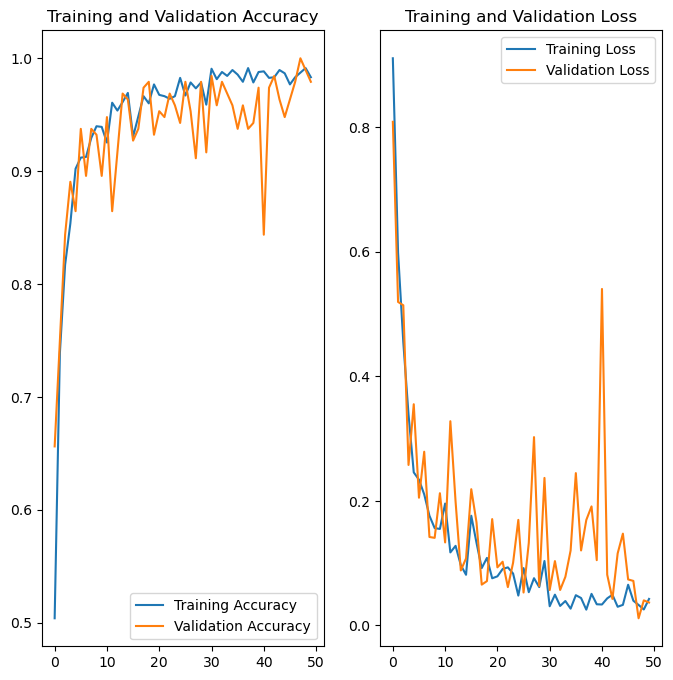

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 293ms/step
predicted label: Potato___Late_blight


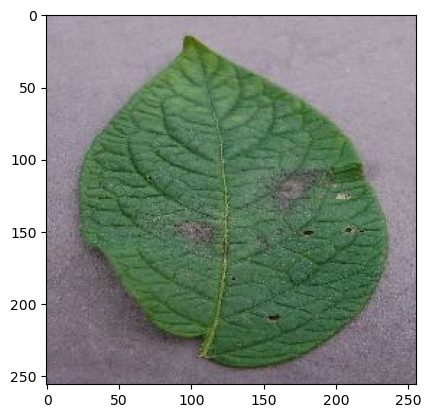

In [53]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Write a function for inference

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 15ms/step


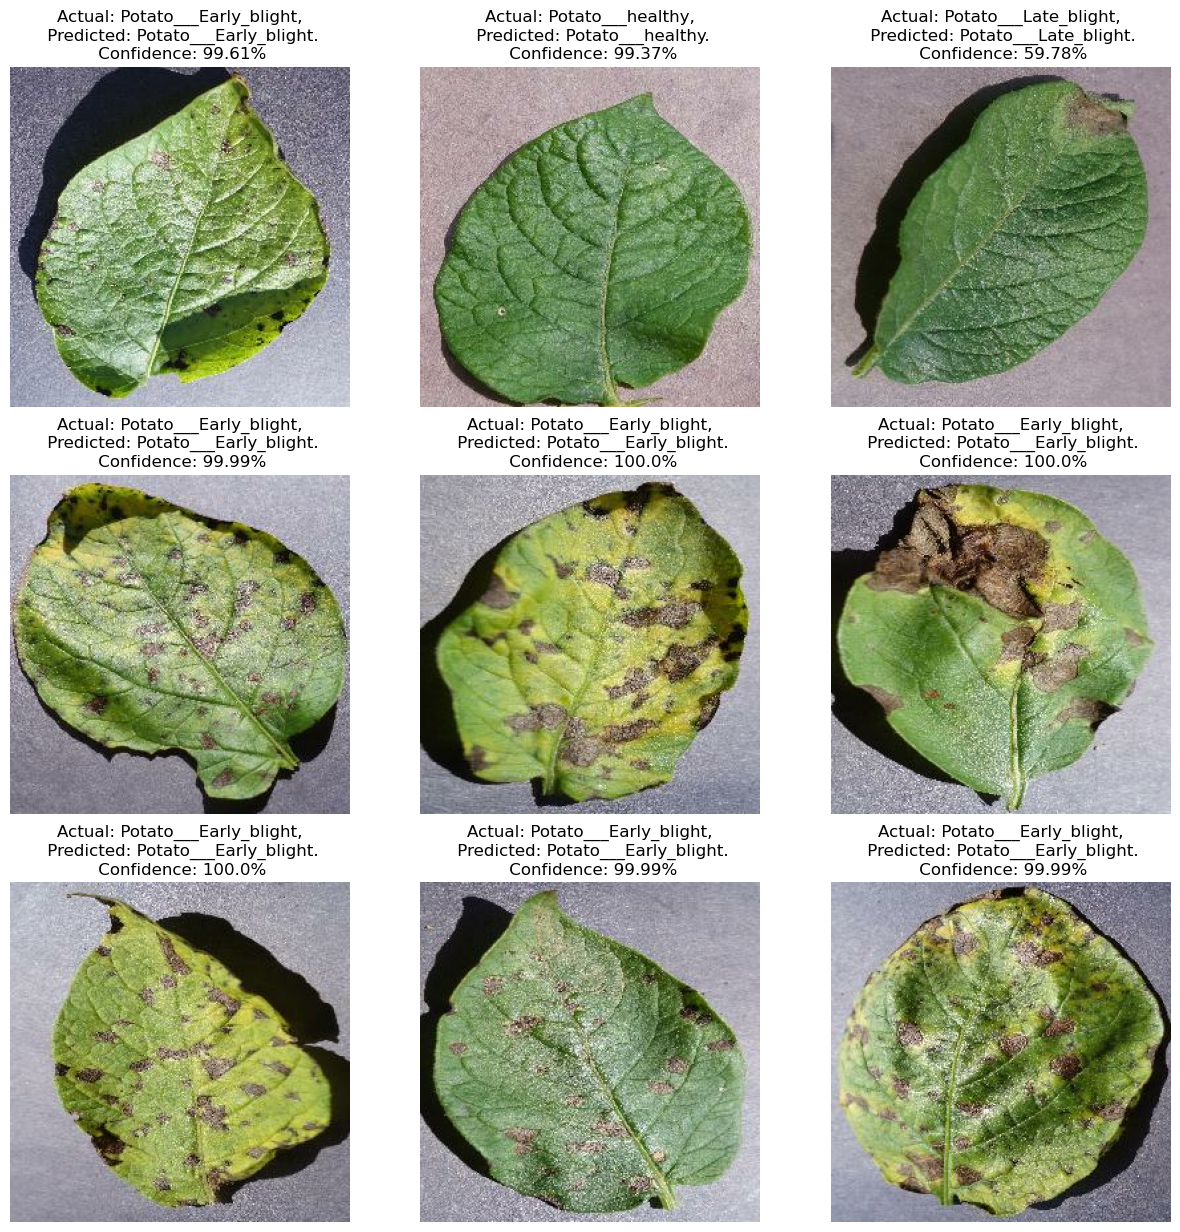

In [57]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Saving the Model
We append the model to the list of models as a new version

In [59]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


In [60]:
model.save("../potatoes.h5")

/Users/marwa/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
